# IMPORTING DEPENDANCIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline

# READING DATA

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.shape

(1030, 9)

## REMOVING DUPLICATED

In [6]:
df.drop_duplicates(inplace=True)

<Axes: >

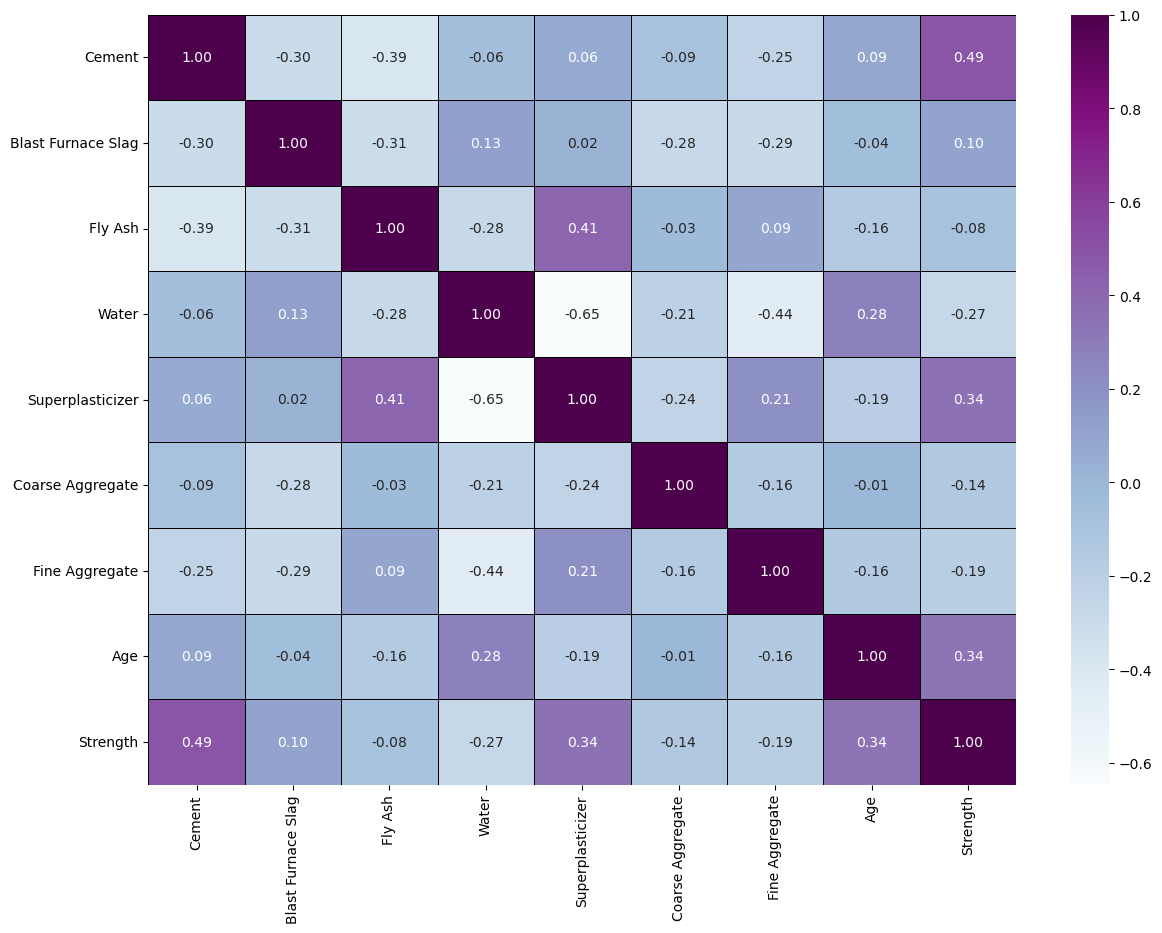

In [32]:
data_corr = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(14,10))
sns.heatmap(data_corr, annot=True, fmt='.02f',cmap='BuPu', linewidths=0.5, linecolor='Black')

In [7]:
for col in df.columns:
    if df[col].value_counts().count() < 10:
        print(col)
        print("-------"*5)
        print(df[col].value_counts())
        print("-------"*10)
    else:
        print(col, df[col].value_counts().count())
        print("-------"*5)

Cement 278
-----------------------------------
Blast Furnace Slag 185
-----------------------------------
Fly Ash 156
-----------------------------------
Water 195
-----------------------------------
Superplasticizer 111
-----------------------------------
Coarse Aggregate 284
-----------------------------------
Fine Aggregate 302
-----------------------------------
Age 14
-----------------------------------
Strength 845
-----------------------------------


In [8]:
X = df.drop(columns=['Strength'])
y = df['Strength']

## SPLITTING THE DATA

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

# USING RANDOM FOREST REGRESSOR

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=70, n_jobs=-1, max_depth=8, max_features=5)

In [34]:
rfr.fit(X_trainS, y_train)

RandomForestRegressor(max_depth=8, max_features=5, n_estimators=70, n_jobs=-1)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = rfr.predict(X_testS)

In [36]:
r2_score(y_test,y_pred)

0.8861698589968767



# Using ANN

In [16]:
import tensorflow as ts
from tensorflow import keras as keras

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

In [18]:
ann = keras.models.Sequential()

In [19]:
ann.add(keras.layers.Dense(units=7, activation='relu'))
ann.add(keras.layers.Dense(units=7, activation='relu'))
ann.add(keras.layers.Dense(units=1))

In [20]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['R2Score'])

In [21]:
ann.fit(X_trainS, y_train, batch_size=32, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 1525.1859 - r2_score: -4.7475
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 1510.1061 - r2_score: -4.6907
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1496.3654 - r2_score: -4.6389
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 1482.2374 - r2_score: -4.5857
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 1466.7358 - r2_score: -4.5272
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 1449.0065 - r2_score: -4.4604
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 1429.0732 - r2_score: -4.3853
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 1406.4381 - r2_score: -4.3000
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 1381.3978 - r2_score: -4.2057
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 2ms/step - loss: 81.4478 - r2_score: 0.6931
Epoch 82/100
26/26 [==============================] - 0s 2ms/step - loss: 80.4563 - r2_score: 0.6968
Epoch 83/100
26/26 [==============================] - 0s 2ms/step - loss: 79.5247 - r2_score: 0.7003
Epoch 84/100
26/26 [==============================] - 0s 2ms/step - loss: 78.6487 - r2_score: 0.7036
Epoch 85/100
26/26 [==============================] - 0s 2ms/step - loss: 77.5744 - r2_score: 0.7077
Epoch 86/100
26/26 [==============================] - 0s 2ms/step - loss: 76.5065 - r2_score: 0.7117
Epoch 87/100
26/26 [==============================] - 0s 2ms/step - loss: 75.6025 - r2_score: 0.7151
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 74.6632 - r2_score: 0.7186
Epoch 89/100
26/26 [==============================] - 0s 2ms/step - loss: 73.8980 - r2_score: 0.7215
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 73.0132 - r2_score: 0.7249
Epo

In [22]:
y_pred = ann.predict(X_testS)

7/7 [==============================] - 0s 3ms/step


In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**(0.5)

In [24]:
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.7233146243995026
Mean Squared Error: 72.57178732758226
Root Mean Squared Error: 8.518907636990923
